## Import necessary libraries.

In [1]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

from ggplot import *


# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


## Read the data files

In [2]:
train = pd.read_csv("../dataset/all/application_train.csv")
test = pd.read_csv("../dataset/all/application_test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## How is the statistic?

In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## How are the target labels spread?

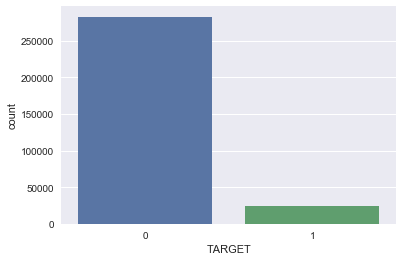

In [5]:
sns.countplot(train.TARGET)

### This is clearly an imbalanced target.

## What are the dimensions of Train and Test dataset?

In [6]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 122)
The test dataset dimensions are as follows: (48744, 121)


## Look at the train dataset

In [7]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Look at the test dataset

In [8]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### As expected, test dataset contains all the columns except the target label.

## What are the missing values and their column names?

In [9]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
    

In [10]:
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
FONDKAPREMONT_MODE,210295,0.683862,68.4
LIVINGAPARTMENTS_MEDI,210199,0.683550,68.4
LIVINGAPARTMENTS_MODE,210199,0.683550,68.4
LIVINGAPARTMENTS_AVG,210199,0.683550,68.4


In [11]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,33495,0.687161,68.7
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MEDI,33347,0.684125,68.4
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
FONDKAPREMONT_MODE,32797,0.672842,67.3
LIVINGAPARTMENTS_AVG,32780,0.672493,67.2
LIVINGAPARTMENTS_MEDI,32780,0.672493,67.2
LIVINGAPARTMENTS_MODE,32780,0.672493,67.2


## What are the different datatypes of columns? - How many floats, integers, categoricals?

In [12]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 

Train dataset: 
float64    65
int64      41
object     16
dtype: int64

Test dataset: 
float64    65
int64      40
object     16
dtype: int64


### In test dataset, 40 int64 indicates that the target label is missing - which is obvious.

In [13]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [14]:
# Create a label encode object having less than 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in train.select_dtypes('object').columns:
    
    # select only those columns where unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        transform_counter+=1
        
print("Transformed-Label encoded {} columns.".format(transform_counter))    

Transformed-Label encoded 4 columns.


In [15]:
# one-hot encode of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [16]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 238)


In [17]:
# collect the target labels to support the aligning 

target = train['TARGET']

In [18]:
train, test = train.align(test,axis=1,join='inner')

In [19]:
train['TARGET'] = target

In [20]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 238)


In [21]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

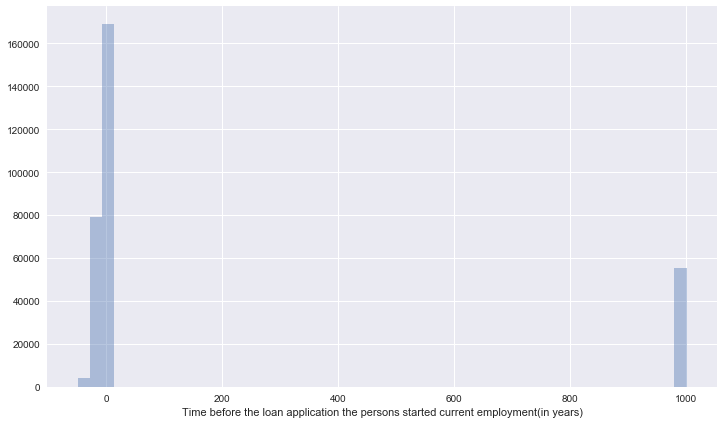

In [22]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365,kde=False)
plt.xlabel("Time before the loan application the persons started current employment(in years)")

### Who are these special people who got employed 1000 years after issuance of the loan? 

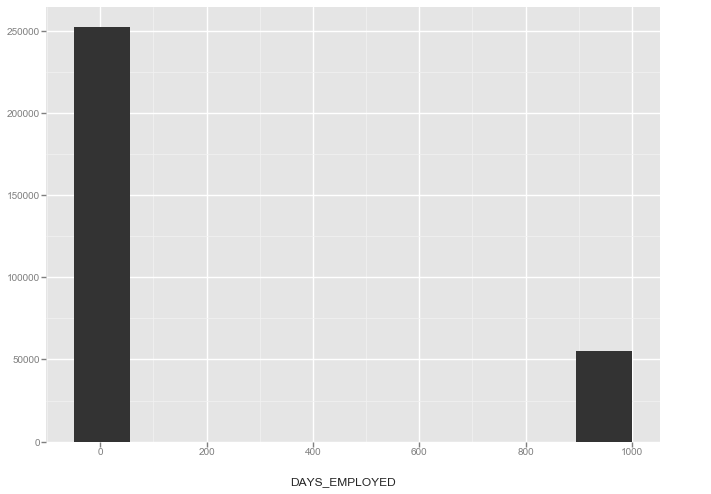

<ggplot: (-9223371923704931454)>

In [23]:
ggplot(aes(x='DAYS_EMPLOYED'), data=train/365) + \
    geom_histogram()

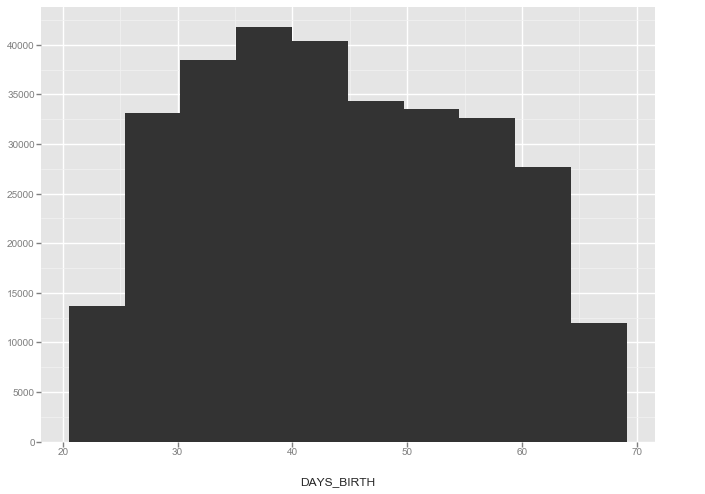

<ggplot: (-9223371923705923177)>

In [24]:
ggplot(aes(x='DAYS_BIRTH'), data=train/-365) + \
    geom_histogram()

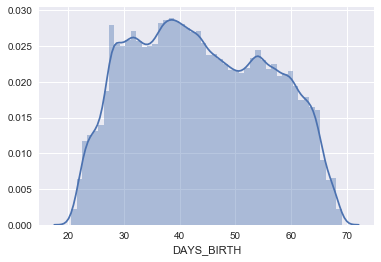

In [25]:
sns.distplot(a=train['DAYS_BIRTH']/-365)

In [26]:
corr_train = train.corr()['TARGET']

In [27]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: float64

### Since EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 and DAYS_BIRTH are highly correlated, let us also explore the possibility of having them as interaction variables.


## Initially filling up the missing values for the most correlated variables.

In [28]:
from sklearn.preprocessing import Imputer

In [29]:
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']

In [30]:
imputer = Imputer(missing_values='NaN', strategy='median')

In [31]:
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [32]:
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

## Let us generate valuable features - interaction variables.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly_feat = PolynomialFeatures(degree=4)

#### I also tried for polynomial degree of order 10. Couldn't find much improvement from degree 4 to 10. Fun fact: order of 10 created over 1000 interaction variables! 

In [35]:
poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [36]:
poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

## Build a dataframe out of interaction variables only!

In [37]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [38]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

## Add the 'TARGET' column which is later used for looking up correlations with the interaction variables.

In [39]:
poly_interaction_train['TARGET'] = train['TARGET']

In [40]:
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

## Which are the most correlated interaction variables?

In [41]:
# looking at the top 15 most positive and negative correlated interaction variables.
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.140230
EXT_SOURCE_3^2 DAYS_BIRTH                            0.141777
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.144206
EXT_SOURCE_2^2 DAYS_BIRTH                            0.149313
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.149813
EXT_SOURCE_3 DAYS_BIRTH                              0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.155891
EXT_SOURCE_2 DAYS_BIRTH                              0.156873
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.164466
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.168159
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.174173
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.189605
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.174534
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.172282
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.170938
EXT_SOURCE_2 EXT_SOURCE_1                  -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                  -0.164065
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.162923
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.161994
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.160677
EXT_SOURCE_2                               -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156867
EXT_SOURCE_3                               -0.155892
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.154886
Name: TARGET, dtype: float64

## Get the names of the columns which have the highest correlation - '1' and 'TARGET' can be dropped.

In [42]:
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

## Choose the selected columns which have highest correlation to 'TARGET'. Columns '1' and 'TARGET' are not necessary!

In [43]:
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [44]:
# look at the selected features
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 DAYS_BIRTH,...,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH
0,0.011573,0.009637,-2487.756636,0.262949,-15.261005,-91.172960,0.001343,-172.008376,-109.495390,-183.785678,...,0.036649,0.005108,-654.152107,0.021834,-28.791659,-346.733022,0.003043,-206.575767,0.000253,-54.318807
1,0.166614,0.207254,-10431.950422,0.622246,-1495.178425,-3474.605044,0.110938,-4039.144848,-2793.283699,-4803.518937,...,0.333073,0.178286,-6491.237078,0.193685,-1738.108981,-5583.975307,0.103675,-3247.125160,0.032271,-2020.509913
2,0.369159,0.225464,-10587.901540,0.555912,-5129.588365,-4294.187521,0.164491,-3272.066505,-7031.006802,-10137.567875,...,0.405575,0.295894,-5885.942404,0.281290,-3908.621640,-7724.580288,0.205220,-5357.456268,0.103841,-2978.274675
3,0.270849,0.226462,-12361.644326,0.650442,-2755.323295,-4303.904125,0.121220,-5229.895165,-5147.479068,-5445.325225,...,0.348166,0.186365,-8040.528832,0.329122,-3348.134986,-6616.894625,0.176171,-6254.966447,0.089142,-4068.490949
4,0.270849,0.055754,-6432.819536,0.322738,-2889.718701,-1111.296208,0.029844,-670.042495,-5398.555790,-5710.929881,...,0.172754,0.092471,-2076.117157,0.163305,-1742.320648,-3443.335521,0.087413,-3254.993372,0.044231,-1050.510985


In [45]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 DAYS_BIRTH,...,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH
0,0.120057,0.099469,-15193.739370,0.789654,-368.491942,-1913.883926,0.015867,-9474.116872,-2310.011305,-489.615795,...,0.125965,0.020094,-11997.802403,0.594305,-1824.110478,-2423.698322,0.094803,-11435.028416,0.071350,-9029.719944
1,0.244619,0.036829,-5268.465530,0.291656,-1913.170762,-665.278990,0.015946,-448.151217,-4418.799416,-3386.201665,...,0.126276,0.054673,-1536.577117,0.164783,-1288.767295,-2281.043619,0.071345,-2976.631403,0.040309,-868.151015
2,0.309160,0.299203,-14022.328504,0.699787,-3785.063810,-5995.438444,0.182811,-6866.756812,-6194.955045,-7480.393855,...,0.427564,0.261238,-9812.640816,0.354091,-4335.147954,-8567.521115,0.216346,-7095.269204,0.109471,-4965.175946
3,0.322119,0.159163,-7123.246872,0.509677,-2758.358532,-2224.456866,0.097520,-1850.411012,-4501.941285,-5246.681115,...,0.312281,0.191336,-3630.555667,0.267955,-2294.536289,-4364.443591,0.164177,-3744.932912,0.086313,-1908.706472
4,0.108203,0.096997,-5550.962315,0.425687,-755.260075,-1264.843931,0.051920,-1005.888062,-1410.972511,-3736.229463,...,0.227860,0.121968,-2362.974127,0.086051,-600.633070,-2971.298294,0.046061,-1122.099233,0.009311,-477.663386


## Get a list of unselected columns that are to be dropped.

In [46]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

##  Drop the unselected columns of the interaction dataframes - train and test versions both.

In [47]:
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)

In [48]:
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

## Merge polynomial features into the original dataframes using their indices.

#### Dropping columns 'EXT_SOURCE_2' and 'EXT_SOURCE_3' since they're already present in the source dataset.

In [49]:
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [50]:
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

## What are their merged dataframe dimensions?

In [51]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 265)
The test dataset dimensions are as follows: (48744, 264)


# Domain Feature Engineering

This article from Wells Fargo explains what factors are looked at while providing money to borrowers.
https://www.wellsfargo.com/financial-education/credit-management/five-c/

Here are the major factors accordingly:<br>
<b>Credit history:</b> Qualifying for the different types of credit hinges largely on your credit history — the track record you’ve established while managing credit and making payments over time. Your credit report is primarily a detailed list of your credit history, consisting of information provided by lenders that have extended credit to you. While information may vary from one credit reporting agency to another, the credit reports include the same types of information, such as the names of lenders that have extended credit to you, types of credit you have, your payment history, and more. 

In addition to the credit report, lenders may also use a credit score that is a numeric value – usually between 300 and 850 – based on the information contained in your credit report. The credit score serves as a risk indicator for the lender based on your credit history. Generally, the higher the score, the lower the risk. Credit bureau scores are often called "FICO® scores" because many credit bureau scores used in the U.S. are produced from software developed by Fair Isaac Corporation (FICO). While many lenders use credit scores to help them make their lending decisions, each lender has its own criteria, depending on the level of risk it finds acceptable for a given credit product.

<b>Capacity:</b> Lenders need to determine whether you can comfortably afford your payments. Your income and employment history are good indicators of your ability to repay outstanding debt. Income amount, stability, and type of income may all be considered. The ratio of your current and any new debt as compared to your before-tax income, known as debt-to-income ratio (DTI), may be evaluated.

<b>Collateral (when applying for secured loans):</b> Loans, lines of credit, or credit cards you apply for may be secured or unsecured. With a secured product, such as an auto or home equity loan, you pledge something you own as collateral. The value of your collateral will be evaluated, and any existing debt secured by that collateral will be subtracted from the value. The remaining equity will play a factor in the lending decision.

<b>Capital:</b> While your household income is expected to be the primary source of repayment, capital represents the savings, investments, and other assets that can help repay the loan. This can be helpful if you lose your job or experience other setbacks.

<b>Conditions:</b> Lenders may want to know how you plan to use the money and will consider the loan’s purpose, such as whether the loan will be used to purchase a vehicle or other property. Other factors, such as environmental and economic conditions, may also be considered. 

Since we don't consider credit history, we can asses other 4 C's.

Let us incorporate the following variables: 

1) <b>debt-to-income ratio(DIR) = Credit amount of the loan / Total Income = AMT_CREDIT/AMT_INCOME_TOTAL</b><br/>
2) <b>annuity-to-income ratio(AIR) = Loan annuity / Total Income = AMT_ANNUITY/AMT_INCOME_TOTAL</b><br/>
3) <b>annuity-to-credit ratio(ACR) = Loan annuity/ Credit amount of the loan = AMT_ANNUITY/AMT_CREDIT</b><br/>
4) <b>days-employed-to-age ratio(DAR) = Number of days employed/ Age of applicant = DAYS_EMPLOYED/DAYS_BIRTH</b><br/>


In [52]:
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [53]:
test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

## Look at the correlation of the newly added variables in relation to the 'TARGET'

In [54]:
corr_vals = train.corr()['TARGET']

In [55]:
corr_vals.tail(4)

DIR   -0.007727
AIR    0.014265
ACR    0.012704
DAR    0.042206
Name: TARGET, dtype: float64

## Hmmm, not much correlation! 

# Preparing the dataset for feeding into the model.

## Feature imputing & scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [57]:
features = list(set(train.columns).difference({'TARGET'}))

In [58]:
imputer = Imputer(strategy="median")

In [59]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [60]:
imputer.fit(train.drop(['TARGET'],axis=1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [61]:
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))

In [62]:
test_transformed = imputer.transform(test)

In [63]:
train_transformed = scaler.fit_transform(train_transformed)

In [64]:
test_transformed = scaler.fit_transform(test_transformed)

In [65]:
print("The train dataset dimensions are as follows: {}".format(train_transformed.shape))
print("The test dataset dimensions are as follows: {}".format(test_transformed.shape))

The train dataset dimensions are as follows: (307511, 268)
The test dataset dimensions are as follows: (48744, 268)


# Split the dataset into training set and validation set

In [66]:
from sklearn.cross_validation import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, 
                                                                                      target, test_size=0.33, random_state=42)

C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Use the Model

### 1. Logistic Regression

In [67]:
# Starting with Logistic Regression.

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [68]:
logistic_regressor.fit(X_training_set,y_training_set)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation_set,log_regression_pred)

0.92010169591738189

### 2. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [72]:
random_forest.fit(X_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [73]:
random_forest_pred = random_forest.predict(X_validation_set)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    7.0s finished


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation_set,random_forest_pred)

0.92001300761733951

### Feature importance random forest

In [75]:
# build a dataframe for checking out feature importance

In [76]:
feature_importance_df = pd.DataFrame({'Feature':features,'Importance':random_forest.feature_importances_})

In [79]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # Normalize the feature importances which gets relative importance
    df['Normalized'] = df['Importance'] / df['Importance'].sum()
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:20]))), 
            df['Importance'].head(20), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:20]))))
    ax.set_yticklabels(df['Feature'].head(20))
    
    plt.show()
    return df

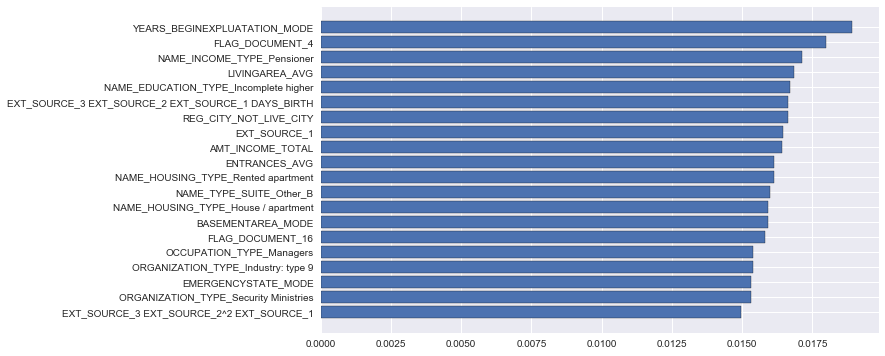

,index,Feature,Importance,Normalized
0,253,YEARS_BEGINEXPLUATATION_MODE,1.891051e-02,1.891051e-02
1,246,FLAG_DOCUMENT_4,1.799297e-02,1.799297e-02
2,13,NAME_INCOME_TYPE_Pensioner,1.713446e-02,1.713446e-02
3,254,LIVINGAREA_AVG,1.685030e-02,1.685030e-02
4,243,NAME_EDUCATION_TYPE_Incomplete higher,1.671418e-02,1.671418e-02
5,265,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,1.663358e-02,1.663358e-02
6,12,REG_CITY_NOT_LIVE_CITY,1.661704e-02,1.661704e-02
7,247,EXT_SOURCE_1,1.644526e-02,1.644526e-02
8,267,AMT_INCOME_TOTAL,1.643481e-02,1.643481e-02
9,259,ENTRANCES_AVG,1.615027e-02,1.615027e-02


In [80]:
plot_importance(feature_importance_df)